In [13]:
# load dataset 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_reward = pd.read_csv('../hpo_reward_sweep.csv')
df_target = pd.read_csv('../hpo_target_seed_sweep.csv')

/tmp/ipykernel_29119/2705859421.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_target, x='target_label', y='final_reward', order=labels, palette=target_palette)


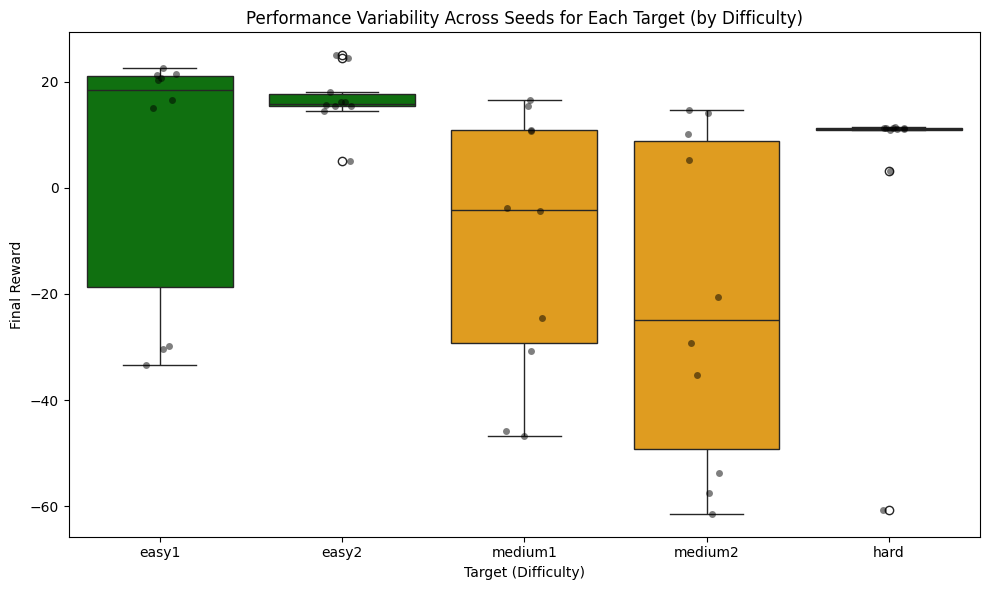

In [14]:


# Calculate distance from (1.5, 22.5)
df_target['distance'] = np.sqrt((df_target['target_x'] - 1.5)**2 + (df_target['target_y'] - 22.5)**2)

# Get unique targets and sort by distance
unique_targets = df_target[['target_x', 'target_y', 'distance']].drop_duplicates().sort_values('distance').reset_index(drop=True)
labels = ['easy1', 'easy2', 'medium1', 'medium2', 'hard']
unique_targets['target_label'] = labels[:len(unique_targets)]

# Merge labels back to df_target
df_target = df_target.merge(unique_targets[['target_x', 'target_y', 'target_label']], on=['target_x', 'target_y'], how='left')

# Define colors for each label
target_palette = {
    'easy1': 'green',
    'easy2': 'green',
    'medium1': 'orange',
    'medium2': 'orange',
    'hard': 'red',
}

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_target, x='target_label', y='final_reward', order=labels, palette=target_palette)
sns.stripplot(data=df_target, x='target_label', y='final_reward', color='black', alpha=0.5, jitter=True, order=labels)
plt.title('Performance Variability Across Seeds for Each Target (by Difficulty)')
plt.ylabel('Final Reward')
plt.xlabel('Target (Difficulty)')
plt.tight_layout()
plt.show()

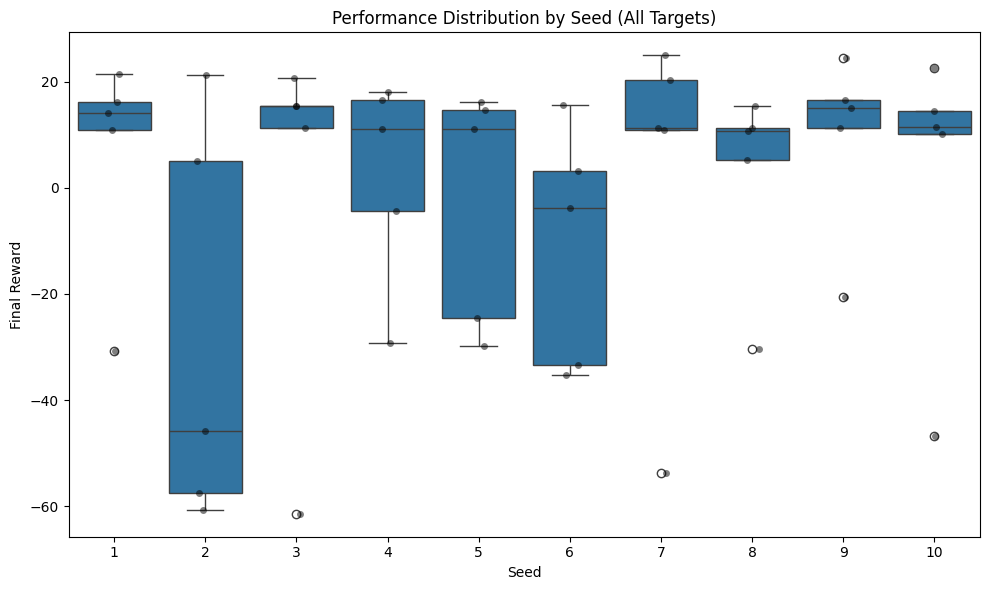

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_target, x='seed', y='final_reward')
sns.stripplot(data=df_target, x='seed', y='final_reward', color='black', alpha=0.5, jitter=True)
plt.title('Performance Distribution by Seed (All Targets)')
plt.xlabel('Seed')
plt.ylabel('Final Reward')
plt.tight_layout()
plt.show()

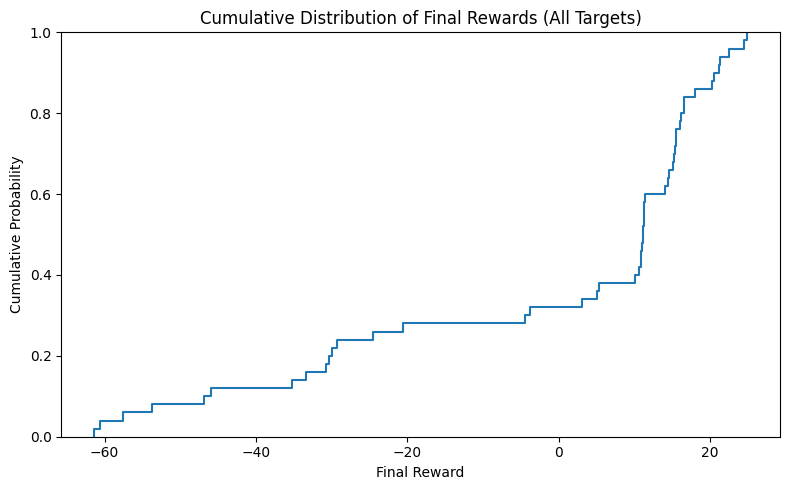

In [20]:
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=df_target, x='final_reward')
plt.title('Cumulative Distribution of Final Rewards (All Targets)')
plt.xlabel('Final Reward')
plt.ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

/tmp/ipykernel_29119/2100039931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_var, x='target_label', y='final_reward', palette=target_palette, order=labels)


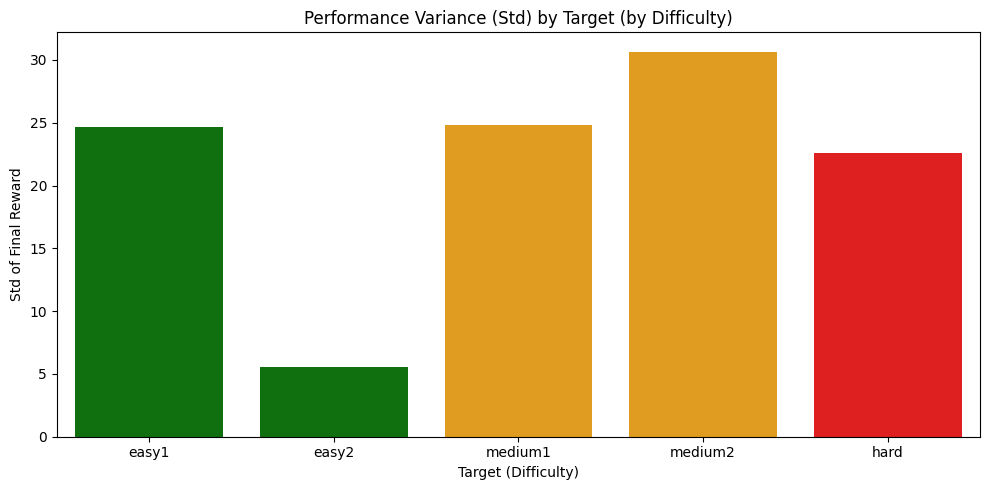

In [21]:
if 'target_label' in df_target.columns:
    target_var = df_target.groupby('target_label')['final_reward'].std().reindex(labels).reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(data=target_var, x='target_label', y='final_reward', palette=target_palette, order=labels)
    plt.title('Performance Variance (Std) by Target (by Difficulty)')
    plt.xlabel('Target (Difficulty)')
    plt.ylabel('Std of Final Reward')
    plt.tight_layout()
    plt.show()

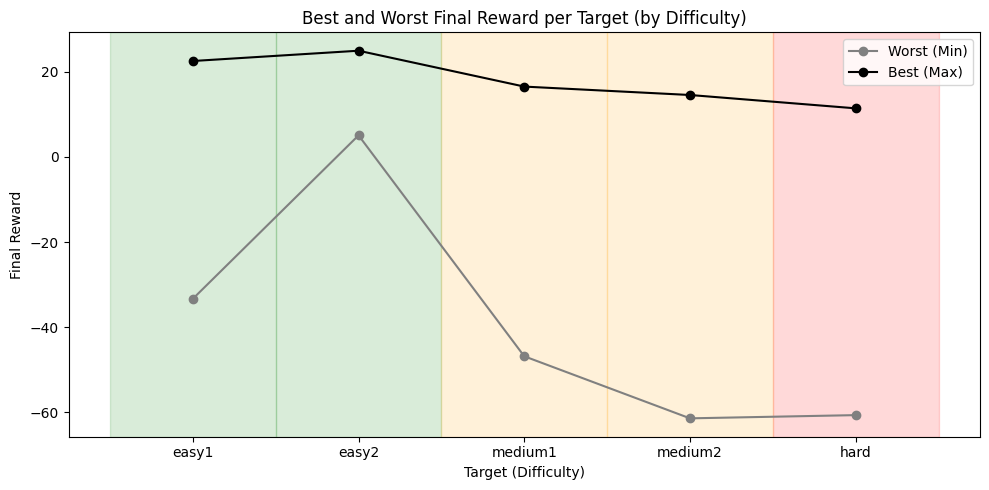

In [22]:
if 'target_label' in df_target.columns:
    target_stats = df_target.groupby('target_label')['final_reward'].agg(['min', 'max']).reindex(labels).reset_index()
    plt.figure(figsize=(10, 5))
    plt.plot(target_stats['target_label'], target_stats['min'], marker='o', label='Worst (Min)', color='gray')
    plt.plot(target_stats['target_label'], target_stats['max'], marker='o', label='Best (Max)', color='black')
    for i, label in enumerate(labels):
        plt.gca().axvspan(i-0.5, i+0.5, color=target_palette[label], alpha=0.15)
    plt.title('Best and Worst Final Reward per Target (by Difficulty)')
    plt.xlabel('Target (Difficulty)')
    plt.ylabel('Final Reward')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [23]:
# Mean Success Rate by Target (by Difficulty)
if 'target_label' in df_target.columns and 'success_rate' in df_target.columns:
    target_success = df_target.groupby('target_label')['success_rate'].mean().reindex(labels).reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=target_success, x='target_label', y='success_rate', palette=target_palette, order=labels)
    plt.title('Mean Success Rate Across Seeds for Each Target (by Difficulty)')
    plt.ylabel('Mean Success Rate')
    plt.xlabel('Target (Difficulty)')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
else:
    print('Column \"success_rate\" not found in df_target.')

Column "success_rate" not found in df_target.
